# Obdelava 44. vaje

## SILA NA VODNIK V MAGNETNEM POLJU

Gregor Žunič, 11.5.2020

## Uvod

$$ F = BIl $$
Sorazmernostni koeficient B je gostota magnetnega polja. Magnetni pretok $\Phi_m$ skozi okvir, ki je pravokoten na silnicah, je v homogenem polju enak produktu:
$$ \Phi_m = BS $$
kjer je S ploščina okvirja. Enota za $B$ je $ [ T = \frac{Vs}{m^2} ]$, enota za $\Phi_m$ pa $Vs$.

## Naloga

1. S tehtanjem pokaži, da je sila na vodnik sorazmerna s tokom.
2. Določi gostoto magnetnega polja in magnetni pretok med poloma magneta!

## Obdelava in rezultati

In [39]:
from scipy.optimize import curve_fit
import scipy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame
from negotovost import Negotovost

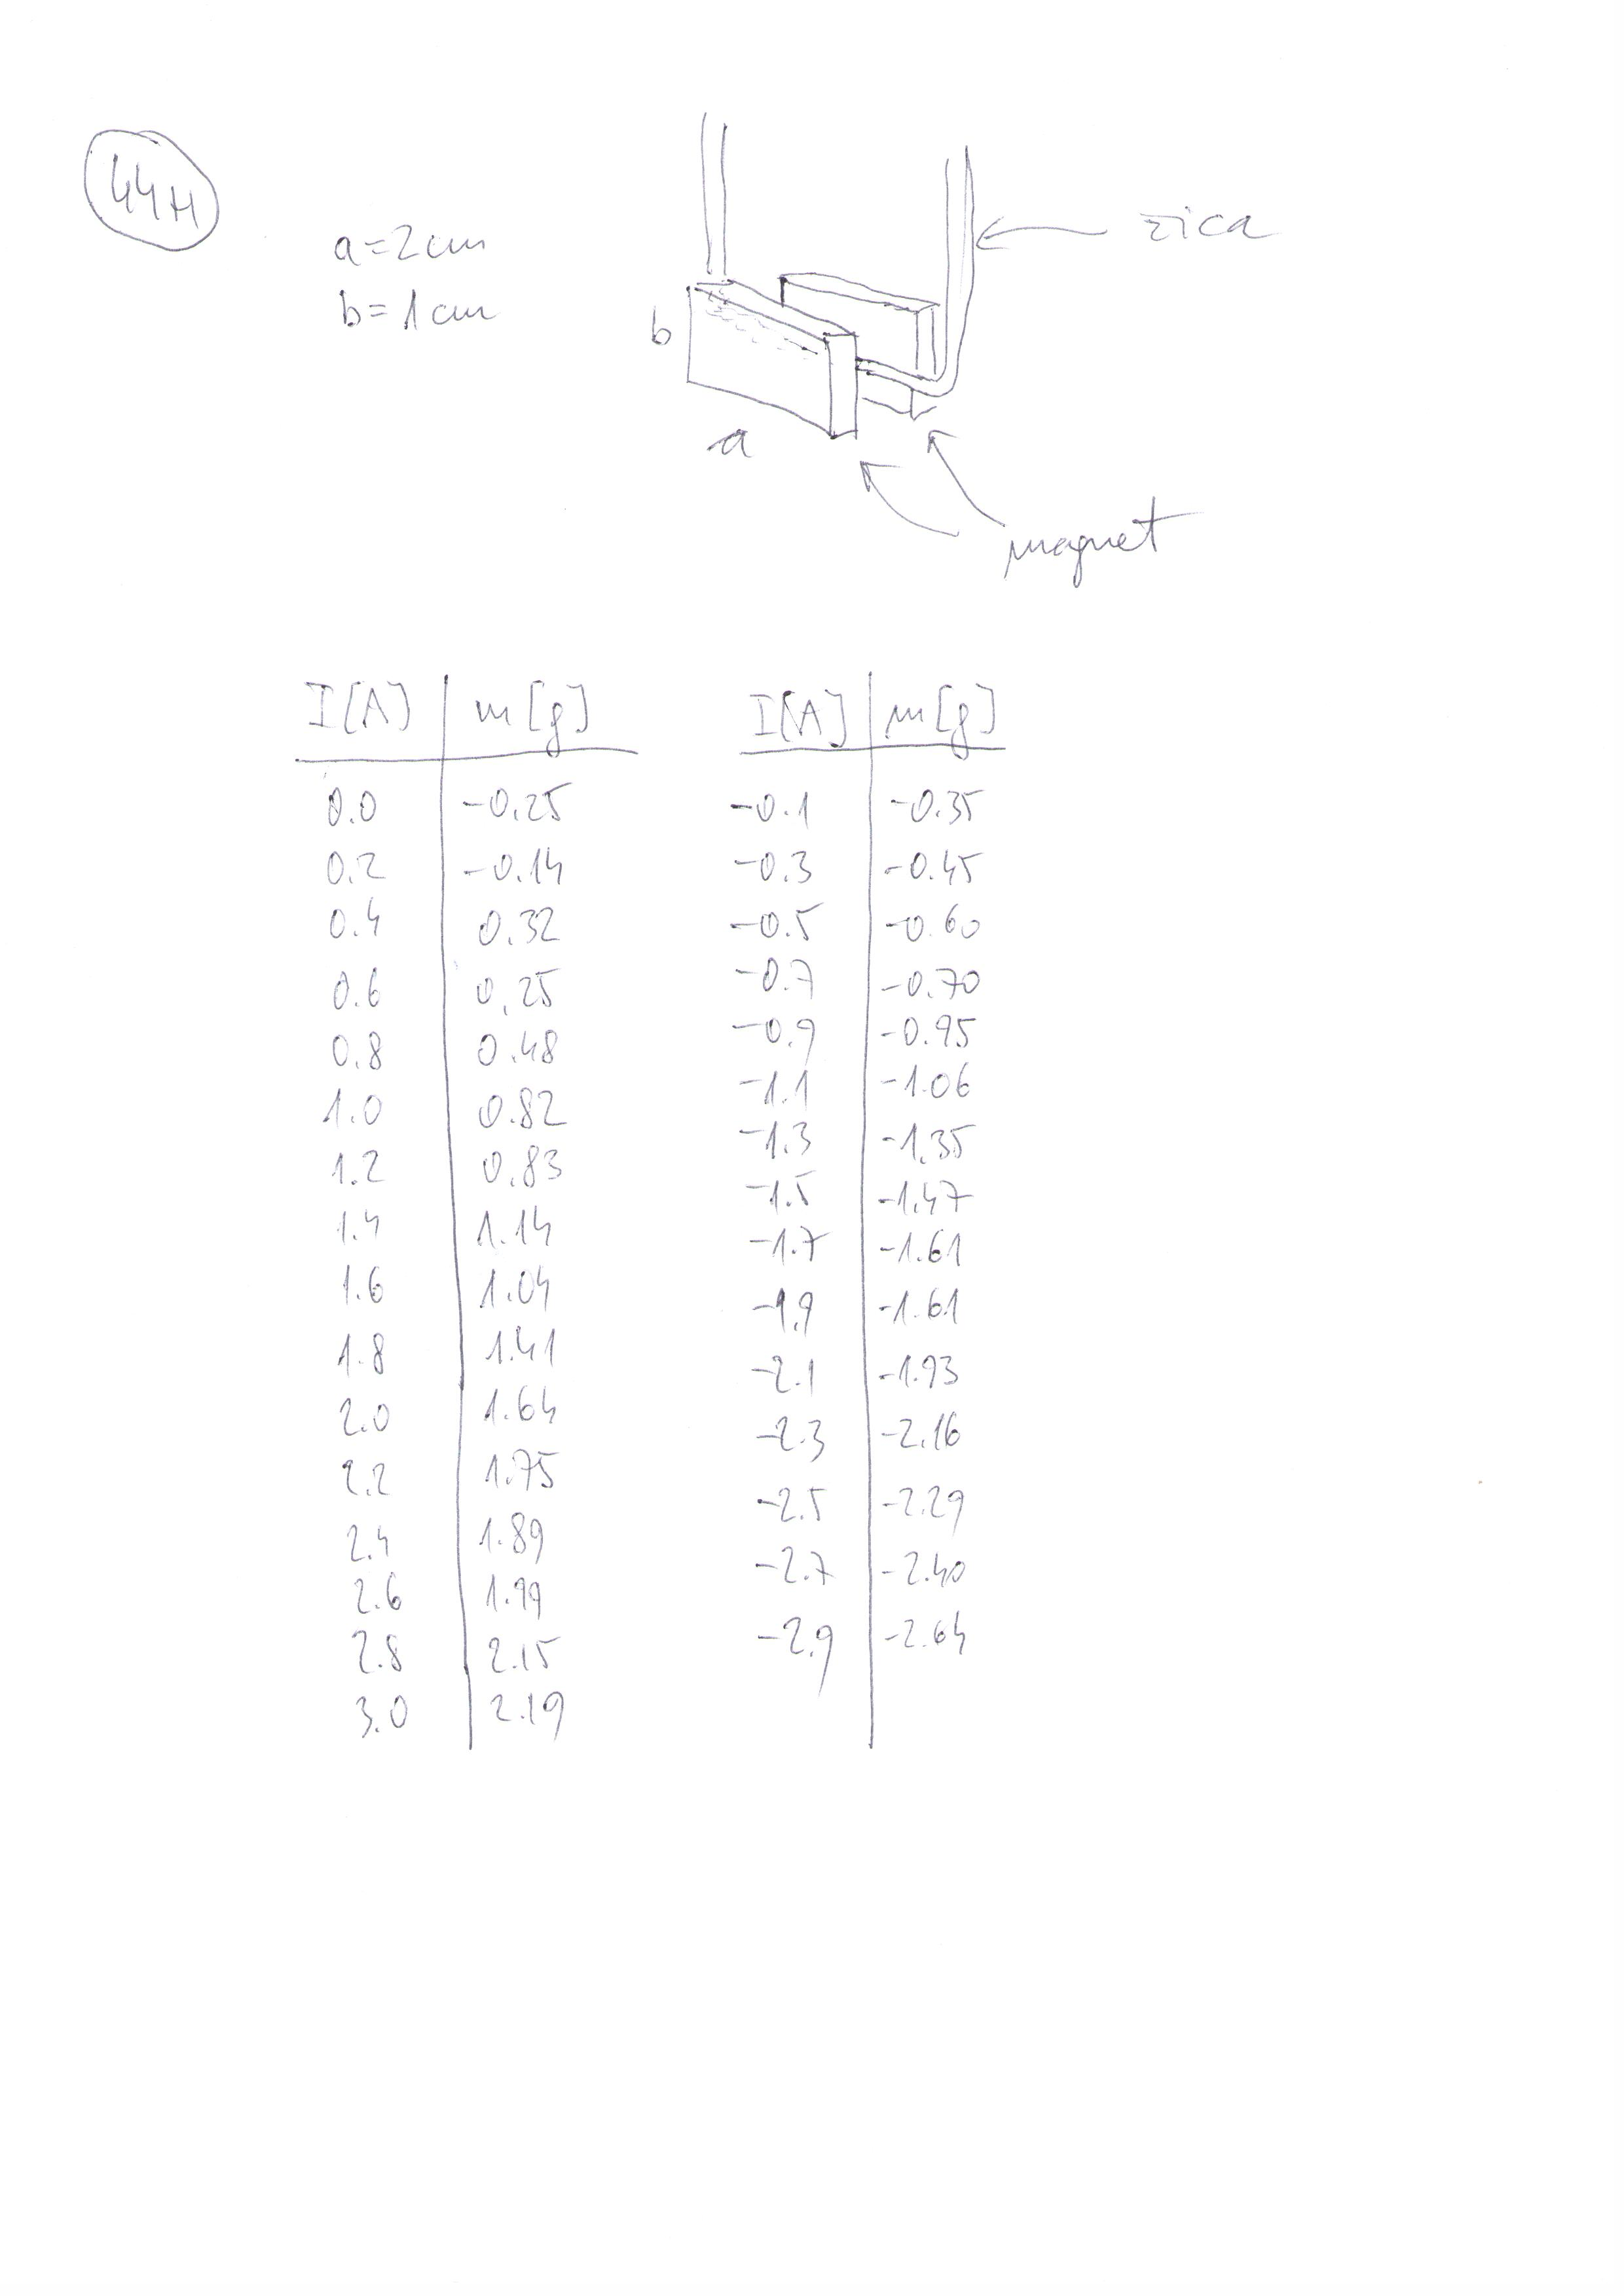

In [2]:
Image(filename='meritve.png',width=700)

In [42]:
pozitivne = pd.read_csv('meritve_poz.csv', comment='#')
negativne = pd.read_csv('meritve_neg.csv', comment='#')
pozitivne['F'] = pozitivne['m']/1000*const.g
negativne['F'] = negativne['m']/1000*const.g
print("i [A], m [g], F[N]")
display(pozitivne.T,negativne.T)

i [A], m [g], F[N]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
I,0.000000,0.200000,0.400000,0.600000,0.800000,1.000000,1.20000,1.40000,1.600000,1.800000,2.000000,2.200000,2.400000,2.600000,2.800000,3.000000
m,-0.250000,-0.140000,0.320000,0.250000,0.480000,0.820000,0.83000,1.14000,1.040000,1.410000,1.640000,1.750000,1.890000,1.990000,2.150000,2.190000
F,-0.002452,-0.001373,0.003138,0.002452,0.004707,0.008041,0.00814,0.01118,0.010199,0.013827,0.016083,0.017162,0.018535,0.019515,0.021084,0.021477


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
I,-0.100000,-0.300000,-0.500000,-0.700000,-0.900000,-1.100000,-1.300000,-1.500000,-1.700000,-1.900000,-2.100000,-2.300000,-2.500000,-2.700000,-2.90000
m,-0.350000,-0.450000,-0.600000,-0.700000,-0.950000,-1.060000,-1.350000,-1.470000,-1.610000,-1.610000,-1.930000,-2.160000,-2.290000,-2.400000,-2.64000
F,-0.003432,-0.004413,-0.005884,-0.006865,-0.009316,-0.010395,-0.013239,-0.014416,-0.015789,-0.015789,-0.018927,-0.021182,-0.022457,-0.023536,-0.02589


Sledi pretvorba mas v silo

In [43]:
def fit_func(x, a, b):
    return x*a+b

In [44]:
params_poz = curve_fit(fit_func, pozitivne['I'], pozitivne['F'])
params_neg = curve_fit(fit_func, negativne['I'], negativne['F'])

a_poz,b_poz = params_poz[0]
a_neg,b_neg = params_neg[0]

errs_poz = np.sqrt(np.diag(params_poz[1]))
print("Pozitivne:\n",'a =', a_poz,'N/A','+-',errs_poz[0],'N/A', '\nb =', b_poz,'N +-',errs_poz[1],"N")

errs_neg = np.sqrt(np.diag(params_neg[1]))
print("Negativne:\n",'a =', a_neg,'N/A','+-',errs_neg[0],'N/A', '\nb =', b_neg,'N +-',errs_neg[1],"N")

Pozitivne:
 a = 0.00822965415048092 N/A +- 0.00029363656873262697 N/A 
b = -0.0016123286319713929 N +- 0.0005170005232037271 N
Negativne:
 a = 0.008111500500106065 N/A +- 0.00018637414643406743 N/A 
b = -0.0019347119498296678 N +- 0.0003226301047155454 N


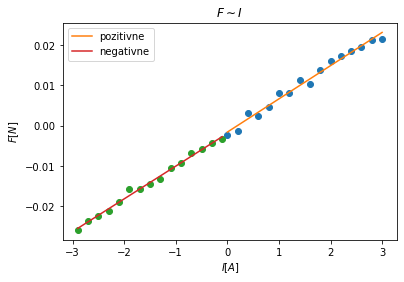

In [45]:
x_poz_fit = np.linspace(min(pozitivne['I']), max(pozitivne['I']), 100)

y_poz_fit = fit_func(x_poz_fit, a_poz, b_poz)

plt.plot(pozitivne['I'], pozitivne['F'], 'o')
plt.plot(x_poz_fit, y_poz_fit, label=r'pozitivne')

# se enako za negativne

x_neg_fit = np.linspace(min(negativne['I']), max(negativne['I']), 100)

y_neg_fit = fit_func(x_neg_fit, a_neg, b_neg)


plt.plot(negativne['I'], negativne['F'], 'o')
plt.plot(x_neg_fit, y_neg_fit, label=r'negativne')

plt.title(r'$F \sim I$')
plt.ylabel(r'$F [N]$')
plt.xlabel(r'$I [A]$')

plt.legend()
plt.show()

In [46]:
k = ((a_poz+a_neg)/2, np.sqrt((errs_poz[0]**2+errs_neg[0]**2)))
print(k)

(0.008170577325293492, 0.00034778981721162854)


S koeficientom $k = (8.32 \pm 0.35) \cdot 10^{-3} \: N/A $ sem preveril, da je zveza med tokom in silo linearna.

### Gostota magnetnega polja

$a = ( 0.02 \pm 0.001 ) m$,
$b = ( 0.01 \pm 0.001 ) m$

$$B = \frac{F}{Ia} = k \cdot a $$

In [47]:
a = [0.02, 0.001]
b = [0.01, 0.001]

B = k[0] * a[0]
err = (a[1]/a[0] + k[1]/k[0]) * B
B = (B,err)

print(B)

(0.00016341154650586985, 1.5126373669526064e-05)


Magnetno polje je $ B = (1.63 \pm 0.15) \cdot 10^{-4} \: T$

Magnetni pretok je
$$ \Phi_m = BS = Bab = k a^2 b $$

In [48]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
data = [
    ('k',k[0],k[1],'N/A'),
    ('a',a[0],a[1],'m'),
    ('b',b[0],b[1],'m'),
    ]

function = 'k*a^2*b'

negotovost = Negotovost(data,function,floating_points=3)
negotovost.draw_table(units=r'T m^2',text_size=16,variable='\Phi_m')

<IPython.core.display.Latex object>

,$\frac{\partial \Phi_m}{\partial x_i}$,$\sigma_i$,$\sigma_i \cdot \frac{\partial \Phi_m}{\partial x_i} $
$k$,$a^{2} b$,$3.478E-04\; N/A$,$1.391E-09\;T m^2$
$a$,$2 a b k$,$1.000E-03\; m$,$3.268E-09\;T m^2$
$b$,$a^{2} k$,$1.000E-03\; m$,$3.268E-09\;T m^2$


<IPython.core.display.Latex object>

Magnetni pretok skozi magnet je
$ \Phi_m = (3.27 \pm 0.49) \cdot 10^{-8} \: Tm^2 $.

### Vprašanja

1. Kako je sila na vodnik odvisna od kota, ki ga oklepata smeri polja in toka? Kakšna je smer sile?
Silo določimo z vektorskim produktom med tokom in poljem. Če je kot med njima $\pi /2$ je sila maksimalna, oz drugimi besedami, lako tudi opišemo vektorski produkt kot produkt s sinusom vmesnega kota. Smer sile določimo s pravilom desne roke, oz če zavrtimo prvi faktor vektorskega produkt proti drugemu, dobimo silo, ki jo določa vijak, če ga zavrtimo v isto smer.



2. Tehtnica silo preračuna v maso. Kaj bi taka tehtnica pokazala, če bi poskus izvajali npr. na Luni, kjer je g = 1,6 m/s 2 ?
Će je tehtnica kalibrirana na pospešek na zemlji bi pokazala 6x manjšo silo kot na zemlji in bi izmerili, da je polje manjše.